# Testing Ulmo

In [50]:
import os
import glob
from importlib import reload

import numpy as np

import xarray
import pandas

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

from ulmo.analysis import evaluate
from ulmo.models import io as model_io
from ulmo import io as ulmo_io
from ulmo.plotting import plotting


In [45]:
%matplotlib ipympl

# Load the VIIRS model

In [2]:
reload(model_io)
pae = model_io.load_ulmo_model('viirs-98', local=True)

Using device=cpu
Loading autoencoder model from: /home/xavier/Projects/Oceanography/data/SST/VIIRS/Ulmo/Models/VIIRS_std_98/autoencoder.pt
Loading flow model from: /home/xavier/Projects/Oceanography/data/SST/VIIRS/Ulmo/Models/VIIRS_std_98/flow.pt


/home/xavier/Projects/Oceanography/python/ulmo/ulmo/ood/ood.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.autoencoder.load_state_dict(torch.load(f, map_location

scaler loaded from: /home/xavier/Projects/Oceanography/data/SST/VIIRS/Ulmo/Models/VIIRS_std_98/VIIRS_2013_98clear_192x192_preproc_viirs_std_train_scaler.pkl


/home/xavier/miniconda3/envs/ocean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Load a stacked image

In [3]:
#img_file = '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/stcc_iop25_20250120000000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc'
#img_path =  '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/'
#img_file = os.path.join(img_path, 'stcc_iop25_20250126070000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc')
img_file = 'SST_stack_2025jan26.nc'

ds = xarray.load_dataarray(img_file)

In [4]:
ds

<xarray.DataArray 'sea_surface_temperature' (time: 1, lat: 64, lon: 64)> Size: 16kB
array([[[298.28   , 298.33   , 298.33   , ..., 298.27   , 298.38998,
         298.47   ],
        [298.28   , 298.33   , 298.34   , ..., 298.25998, 298.37   ,
         298.41   ],
        [298.3    , 298.32   , 298.35   , ..., 298.34   , 298.4    ,
         298.35   ],
        ...,
        [299.03998, 299.     , 298.88   , ..., 299.44   , 299.44   ,
         299.41   ],
        [299.13998, 299.15   , 298.91998, ..., 299.44998, 299.43   ,
         299.46   ],
        [299.21   , 299.03   , 299.03   , ..., 299.44   , 299.43   ,
         299.46   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 256B 21.27 21.25 21.23 21.21 ... 20.05 20.03 20.01
  * lon      (lon) float32 256B 130.0 130.0 130.1 130.1 ... 131.2 131.2 131.3
  * time     (time) datetime64[ns] 8B 2025-01-26T07:00:00
Attributes:
    comment:                SST obtained by regression with buoy measurements...
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  kelvin
    valid_max:              32767
    valid_min:              -32767
    grid_mapping:           crs
    coverage_content_type:  physicalMeasurement

## Plot SST

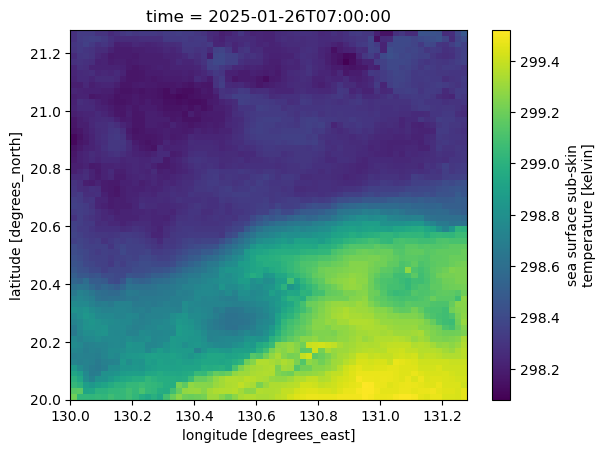

In [5]:
ds.plot()

# Run me Ulmo

In [13]:
mask = np.zeros_like(ds.data, dtype=bool)

## Pre-processing steps

In [14]:
pdict = dict(inpaint=True, median=False, downscale=False)

In [16]:
reload(evaluate)
latents, LL, meta = evaluate.eval_raw_sst(pae, ds.data, mask, pdict=pdict)

Calculating latents..


Computing latents!:   0%|          | 0/1 [00:00<?, ?batch/s]

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/connection.p

Scaling..
Probabilities now


Computing log probs:   0%|          | 0/1 [00:00<?, ?batch/s]

Exception ignored in: <function _ConnectionBase.__del__ at 0x7479d8918900>
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/connection.py", line 133, in __del__
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    self._close()
  File "/home/xavier/miniconda3/envs/ocean/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Exception in thread QueueFeederThread:
Traceback (

In [17]:
LL

521.7581176757812

# Compare to VIIRS

In [62]:
viirs_tbl_file = os.path.join(os.getenv('OS_SST'), 'VIIRS', 'Tables', 
                                'VIIRS_all_95clear_std.parquet')
viirs = ulmo_io.load_main_table(viirs_tbl_file)

Read main table: /home/xavier/Projects/Oceanography/data/SST/VIIRS/Tables/VIIRS_all_95clear_std.parquet


In [28]:
viirs.keys()

Index(['filename', 'row', 'col', 'lat', 'lon', 'clear_fraction', 'field_size',
       'datetime', 'ex_filename', 'pp_file', 'pp_root', 'pp_idx', 'pp_type',
       'mean_temperature', 'Tmin', 'Tmax', 'T90', 'T10', 'LL', 'Year', 'DT'],
      dtype='object')

## VIIRS only

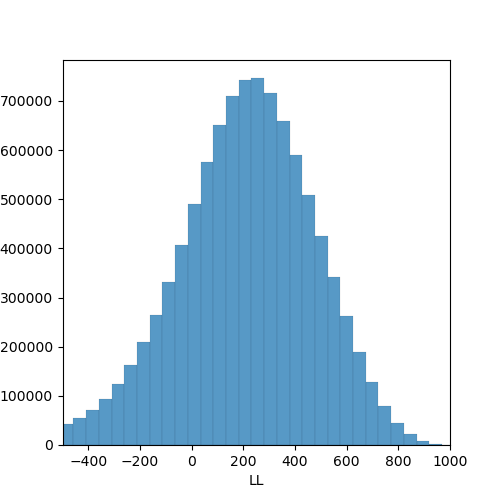

In [64]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
_ = sns.histplot(viirs.LL, bins=500, ax=ax)
#
ax.set_xlim(-500., 1000.)
#
plt.show()

## DT vs. LL

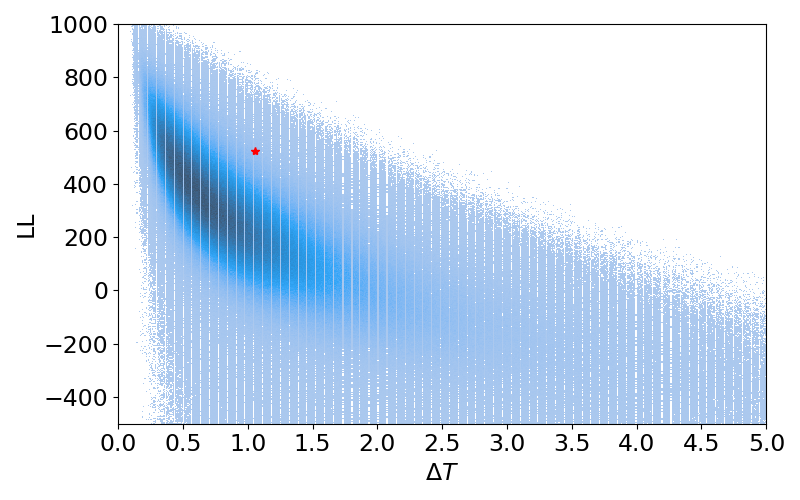

In [65]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
#
_ = sns.histplot(x=viirs.DT, y=viirs.LL, ax=ax)#, s=0.5)
# Our object
ax.plot(meta['T90']-meta['T10'], LL, 'r*')
#
ax.set_xlim(0., 5.)
ax.set_ylim(-500., 1000.)
# 
ax.set_xlabel(r'$\Delta T$')
ax.set_ylabel('LL')
ax.xaxis.set_major_locator(MultipleLocator(0.5))
plotting.set_fontsize(ax, 17.)
#
plt.tight_layout()
plt.show()

# Cut on Region

In [66]:
viirs.lon.min()

np.float64(-179.99992)

In [67]:
ddeg = 2.
in_region = (np.abs(viirs.lon-130.5) < ddeg) & (np.abs(viirs.lat-20.5) < ddeg)
v_in = viirs[in_region]
np.sum(in_region)

np.int64(4398)

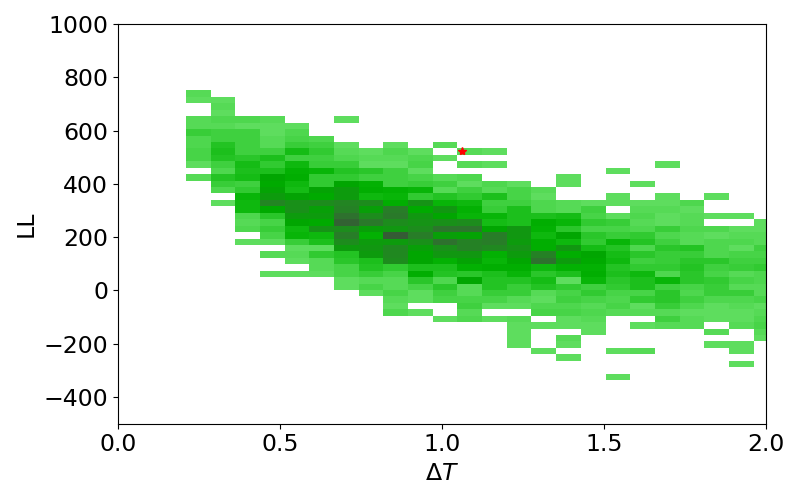

In [68]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
#
_ = sns.histplot(x=v_in.DT, y=v_in.LL, ax=ax, color='green')#, s=0.5)
# Our object
ax.plot(meta['T90']-meta['T10'], LL, 'r*')
#
ax.set_xlim(0., 2.)
ax.set_ylim(-500., 1000.)
#
ax.set_xlabel(r'$\Delta T$')
ax.set_ylabel('LL')
plotting.set_fontsize(ax, 17.)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
# 
#
plt.tight_layout()
plt.show()